In [199]:
%matplotlib inline

#Make 3D plots
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
#from matplotlib import animation
from IPython.display import HTML
from matplotlib.colors import LogNorm
#from itertools import zip_longest

import numpy as np


punto di sella in (0,-1) e minimo in (1, 1)

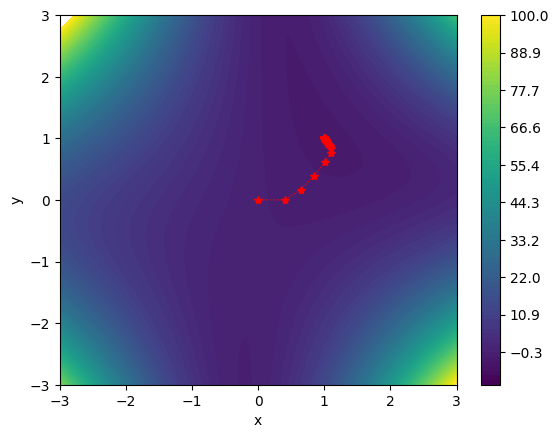

In [200]:
def gradient(pos):
    x = pos[0]
    y = pos[1]
    return np.array([2*x-2+2*x*y**2-2*y, 2*x**2*y -2*x])

def update(pos, learning_rate):
    pos -= learning_rate * gradient(pos)

iteration_number = 10000
initial_pos = np.array([0,0])
positions = np.zeros((iteration_number+1,2))
positions[0] = initial_pos

learning_rate = 0.2

for i in range(iteration_number):
    positions[i+1] = positions[i]
    update(positions[i+1], learning_rate)

#matplotlib
X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = X**2 - 2*X  + X**2 * Y**2 - 2*X*Y

fig, axs = plt.subplots()
co = axs.contourf(X, Y, Z, levels=np.linspace(-10, 100, 80))
fig.colorbar(co, ax=axs)

def overlay_trajectory_contour(axs,trajectory, label,color='k',lw=2):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    axs.plot(xs,ys, color, label=label,lw=lw)
    return axs;

overlay_trajectory_contour(axs,positions,'$\eta=$%s'% learning_rate,'r--*', lw=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("relazione/images/gradient_descent", dpi = 800)


hessiana:  [[ 0.  -0.5]
 [-0.5 -0.5]]


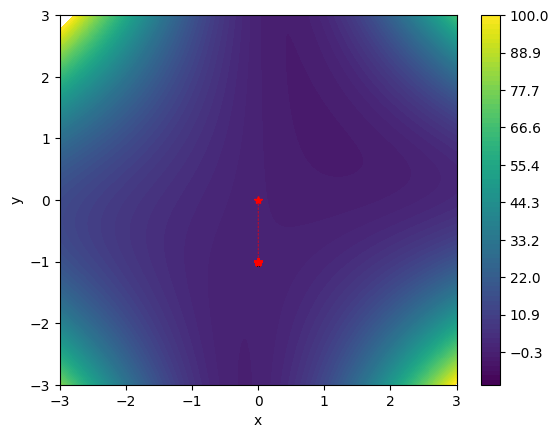

In [201]:
#using newton's method:

def hess_inv(pos):
    x = pos[0]
    y = pos[1]
    hessian = np.array([[2+2*y**2, 4*x*y-2],[4*x*y-2, 2*x**2]])
    return np.linalg.inv(hessian)


def gradient(pos):
    x = pos[0]
    y = pos[1]
    return np.array([2*x-2+2*x*y**2-2*y, 2*x**2*y -2*x])

def update(pos, learning_rate):
    pos -= learning_rate @ gradient(pos)

iteration_number = 10000
initial_pos = np.array([0,0])
positions = np.zeros((iteration_number+1,2))
positions[0] = initial_pos

for i in range(iteration_number):
    positions[i+1] = positions[i]
    update(positions[i+1], hess_inv(positions[i]))

#matplotlib
X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = X**2 - 2*X  + X**2 * Y**2 - 2*X*Y

fig, axs = plt.subplots()
co = axs.contourf(X, Y, Z, levels=np.linspace(-10, 100, 80))
fig.colorbar(co, ax=axs)

def overlay_trajectory_contour(axs,trajectory, label,color='k',lw=2):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    axs.plot(xs,ys, color, label=label,lw=lw)
    return axs;

overlay_trajectory_contour(axs,positions,'newton methos', 'r--*', lw=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("relazione/images/newton_method", dpi = 800)

print("hessiana: ", hess_inv(np.zeros((2))))


Esercizio 2

**(a)**

[ -0.05072381   8.38435509 -15.96913587  -6.07643576   4.14777196
   8.41872194   7.1990553    2.95092884  -2.12161774  -7.0226662 ]


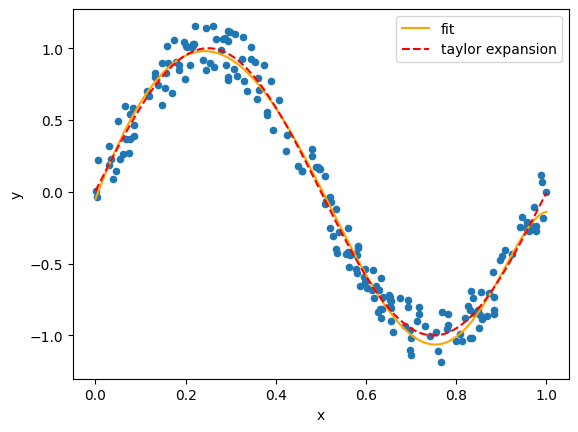

In [242]:
#number of data
n_data = 200
iteration_number = 100000
learning_rate = 0.2
batch_size = 20
# pol_order is the order of the polynomial -1
pol_order = 10

x = np.random.rand(n_data)

y = np.sin(2*np.pi*x)+(np.random.rand(len(x))-0.5)*(0.2/0.5)

fig, ax = plt.subplots()
ax.scatter(x,y, s = 20)

parameters = np.random.rand(pol_order)-0.5

def batch(x,y, batch_size):
    in_batch = np.random.choice(np.arange(len(x)), batch_size)
    x_batch = np.array([x[i] for i in in_batch])
    y_batch = np.array([y[i] for i in in_batch])
    return (np.array(x_batch), np.array(y_batch))

def polynomial(parameters, x, order):
    temp = np.zeros(len(x))
    for i in range(order):
        temp += parameters[i]*(x**i)
    return temp

def gradient(parameters, x, y):
    temp = np.zeros(len(parameters))
    pol = polynomial(parameters, x, len(parameters))
    for i in range(0, len(parameters)):
        temp[i] = -2*np.sum((y-pol)*(x**i))/len(x)
    return temp

def update(parameters, learning_rate, x, y):
    parameters -= learning_rate * gradient(parameters, x , y)


for i in range(iteration_number):
    batch_x, batch_y = batch(x,y, batch_size)
    update(parameters, learning_rate, batch_x ,batch_y)

x_lin = np.linspace(0., 1., n_data)
y_predicted = polynomial(parameters, x_lin ,pol_order)
ax.plot(x_lin, y_predicted, color = 'orange', label = "fit")

#comparing with taylor expansion
par_taylor = np.array([0.00692527, 6.13253, 1.4848, -50.0794, 34.0311, -10.1117, 173.146, \
-301.822, 189.264, -42.0587, -3.23628*10**(-15)])
y_taylor = polynomial(par_taylor[:pol_order], x_lin, pol_order)

ax.plot(x_lin, y_taylor, color = 'red', linestyle = 'dashed', label = "taylor expansion")
ax.legend()
plt.xlabel('x')
plt.ylabel('y')

print(parameters)

plt.savefig("relazione/images/sine_fit", dpi = 800)

nesterov has reached global minima in  55 iterations
gradient descent with momentum has reached global minima in  129 iterations


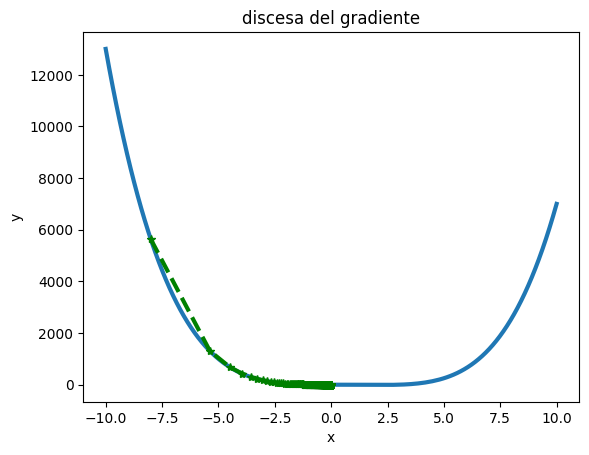

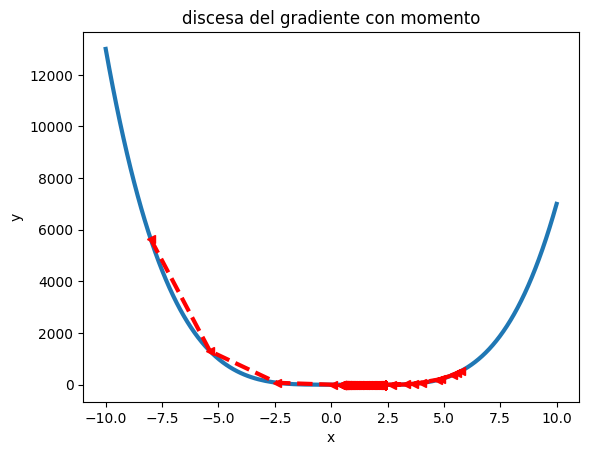

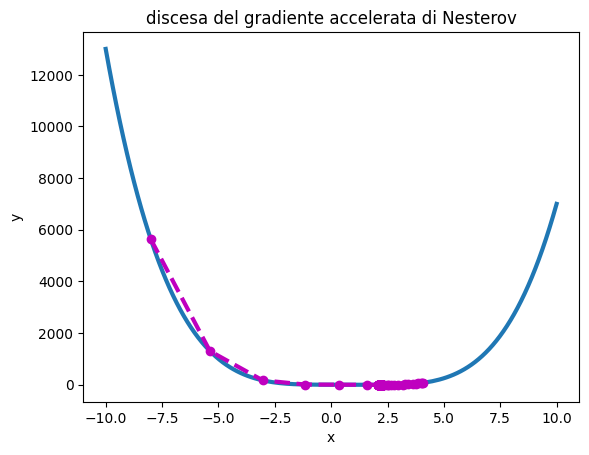

In [240]:
learning_rate = 0.001
momentum_parameter = 0.8
iteration_number = 10000
initial_pos = -8
initial_speed = 0

#gradient descent method
pos_grad = np.zeros(iteration_number+1)

#gradient descent with momentum method
pos_mom = np.zeros(iteration_number+1)
speed_mom = np.zeros(iteration_number+1)

#Nesterov method
pos_nesterov = np.zeros(iteration_number+1)
speed_nesterov = np.zeros(iteration_number+1)

#setting the initial position and speeds
pos_grad[0] = initial_pos

pos_mom[0] = initial_pos
speed_mom[0] = initial_speed

pos_nesterov[0] = initial_pos
speed_nesterov[0] = initial_speed

#function definitions
def gradient(pos):
    return 4*(pos**3) - 9*(pos**2)

def update_grad(pos, learning_rate):
    pos -= learning_rate * gradient(pos)
    return pos

def update_mom(pos, speed, learning_rate, momentum_parameter):
    speed = speed*momentum_parameter + learning_rate*gradient(pos)
    pos -= speed
    return (pos, speed)
    
def update_nesterov(pos, speed, learning_rate, momentum_parameter):
    speed = speed*momentum_parameter + learning_rate*gradient(pos-momentum_parameter*speed)
    pos -= speed
    return (pos, speed)

#booleans to indicate if it has found the minima:
reached_destination_grad = False
reached_destination_mom = False
reached_destination_nesterov = False

#update loop
for i in range(iteration_number):
    pos_grad[i+1] = update_grad(pos_grad[i], learning_rate)
    pos_mom[i+1], speed_mom[i+1] = update_mom(pos_mom[i], speed_mom[i], learning_rate, momentum_parameter)
    pos_nesterov[i+1], speed_nesterov[i+1] = update_nesterov(pos_nesterov[i], speed_nesterov[i], learning_rate, momentum_parameter)

    if not reached_destination_grad:
        if np.isclose(pos_grad[i+1], 9./4., atol=0.01) and np.isclose(pos_grad[i], 9./4., atol=0.01):
            print("classical gradient descent has reached global minima in ", i, "iterations")
            reached_destination_grad = True
        if np.isclose(pos_grad[i+1], 0., atol=0.01) and np.isclose(pos_grad[i], 0., atol=0.01):
            print("classical gradient descent has reached saddle point in ", i, "iterations")
            reached_destination_grad = True

    if not reached_destination_mom:
        if np.isclose(pos_mom[i+1], 9./4., atol=0.01) and np.isclose(pos_mom[i], 9./4., atol=0.01):
            print("gradient descent with momentum has reached global minima in ", i, "iterations")
            reached_destination_mom = True
        if np.isclose(pos_mom[i+1], 0., atol=0.01) and np.isclose(pos_mom[i], 0., atol=0.01):
            print("gradient descent with momentum has reached saddle point in ", i, "iterations")
            reached_destination_mom = True

    if not reached_destination_nesterov:
        if np.isclose(pos_nesterov[i+1], 9./4., atol=0.01) and np.isclose(pos_nesterov[i], 9./4., atol=0.01):
            print("nesterov has reached global minima in ", i, "iterations")
            reached_destination_nesterov = True
        if np.isclose(pos_nesterov[i+1], 0., atol=0.01) and np.isclose(pos_nesterov[i], 0., atol=0.01):
            print("nesterov has reached saddle point in ", i, "iterations")
            reached_destination_nesterov = True



#plotting
def overlay_trajectory(ax, xs, label, color='k', lw=2):
    ys = xs**4-3*xs**3+2
    ax.plot(xs,ys, color, label=label,lw=lw)
    return ax

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()

x = np.linspace(-10, 10, 128)
y = x**4 -3*x**3 +2

ax1.plot(x,y, lw= 3)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title("discesa del gradiente")

ax2.plot(x,y, lw= 3)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title("discesa del gradiente con momento")

ax3.plot(x,y,  lw= 3)
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_title("discesa del gradiente accelerata di Nesterov")

overlay_trajectory(ax1,pos_grad,'gradient','g--*', lw=3)
overlay_trajectory(ax2,pos_mom,'momentum','r--<', lw=3)
overlay_trajectory(ax3,pos_nesterov,'nesterov','m--o', lw=3)

fig1.savefig("relazione/images/classico", dpi = 800)
fig2.savefig("relazione/images/momentum", dpi = 800)
fig3.savefig("relazione/images/nesterov", dpi = 800)

In [204]:
sig_x = np.array([[0,1],[1,0]])
sig_y = np.array([[0,-1j], [1j, 0]])
sig_z = np.array([[1,0],[0,-1]])

def commutator(a,b):
    return (a@b - b@a)

print(commutator(sig_x, sig_z))
print(commutator(sig_y, sig_z))
print(commutator(sig_x, sig_y))

[[ 0 -2]
 [ 2  0]]
[[0.+0.j 0.+2.j]
 [0.+2.j 0.+0.j]]
[[0.+2.j 0.+0.j]
 [0.+0.j 0.-2.j]]
